# **Analyze Schumacher**
Analysis of EBs pharmacologically induced from Vrij. I use object contains concatenated standard and EBs.

In [3]:
import scanpy as sc
import anndata as ad
from collections import defaultdict
import matplotlib as mpl
import anndata as ad
import numpy as np

**Read the object**

In [9]:
adata = ad.read_h5ad('Processing/Schu_ssVrij/Objects/object_1_Deng_filtered_1_2_Chen_filtered_1_3_Mohammed_filtered_1_4_Nowo_filtered_1_4bis_Nowo_filtered_1_5_Posfai_filtered_2_6_Arg_filtered_1_8_Schu_filtered_1.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 3297 × 35704
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'n_genes'


**Normalize data and run PCA**

In [10]:
# Data normalization
sc.pp.normalize_total(adata, target_sum=1e4)

# Log on datas
sc.pp.log1p(adata)

# Stock data logs 
adata.raw = adata

# Scale the data
sc.pp.scale(adata)

# Highly variable genes
sc.pp.highly_variable_genes(adata)

# Run PCA
sc.tl.pca(adata)

C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\scanpy\_utils\__init__.py:551: RuntimeWarning: overflow encountered in multiply
  return x * y


**Run harmony**

In [12]:
sc.external.pp.harmony_integrate(adata, 'dataset', theta = 1, max_iter_harmony = 20, nclust = 3)

2024-07-09 10:37:17,240 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-09 10:37:18,852 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-09 10:37:18,861 - harmonypy - INFO - Iteration 1 of 20
2024-07-09 10:37:18,953 - harmonypy - INFO - Iteration 2 of 20
2024-07-09 10:37:19,014 - harmonypy - INFO - Iteration 3 of 20
2024-07-09 10:37:19,114 - harmonypy - INFO - Iteration 4 of 20
2024-07-09 10:37:19,225 - harmonypy - INFO - Iteration 5 of 20
2024-07-09 10:37:19,306 - harmonypy - INFO - Converged after 5 iterations


**Run PCA and UMAPs**

In [13]:
# Save new PCA
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']

# Find neighbors
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20)

# Make groups
sc.tl.louvain(adata, resolution=0.8)

# Run UMAP
sc.tl.umap(adata)

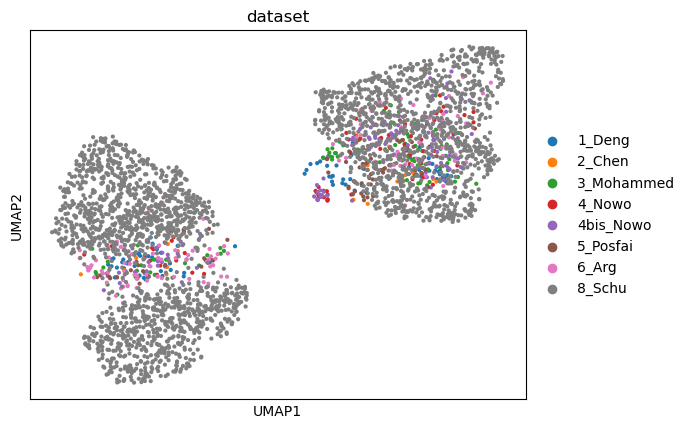

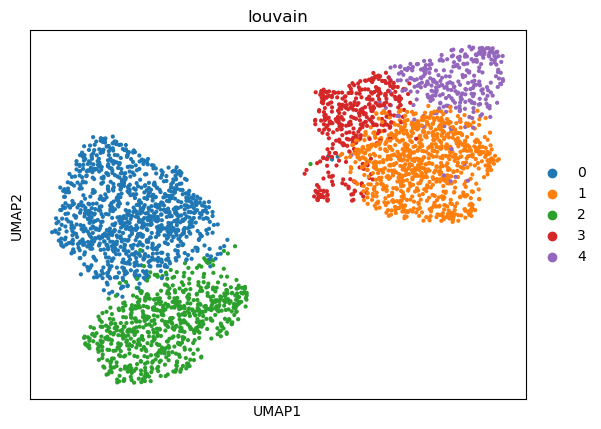

In [14]:
sc.pl.umap(adata, color=['dataset'])
sc.pl.umap(adata, color=['louvain'])

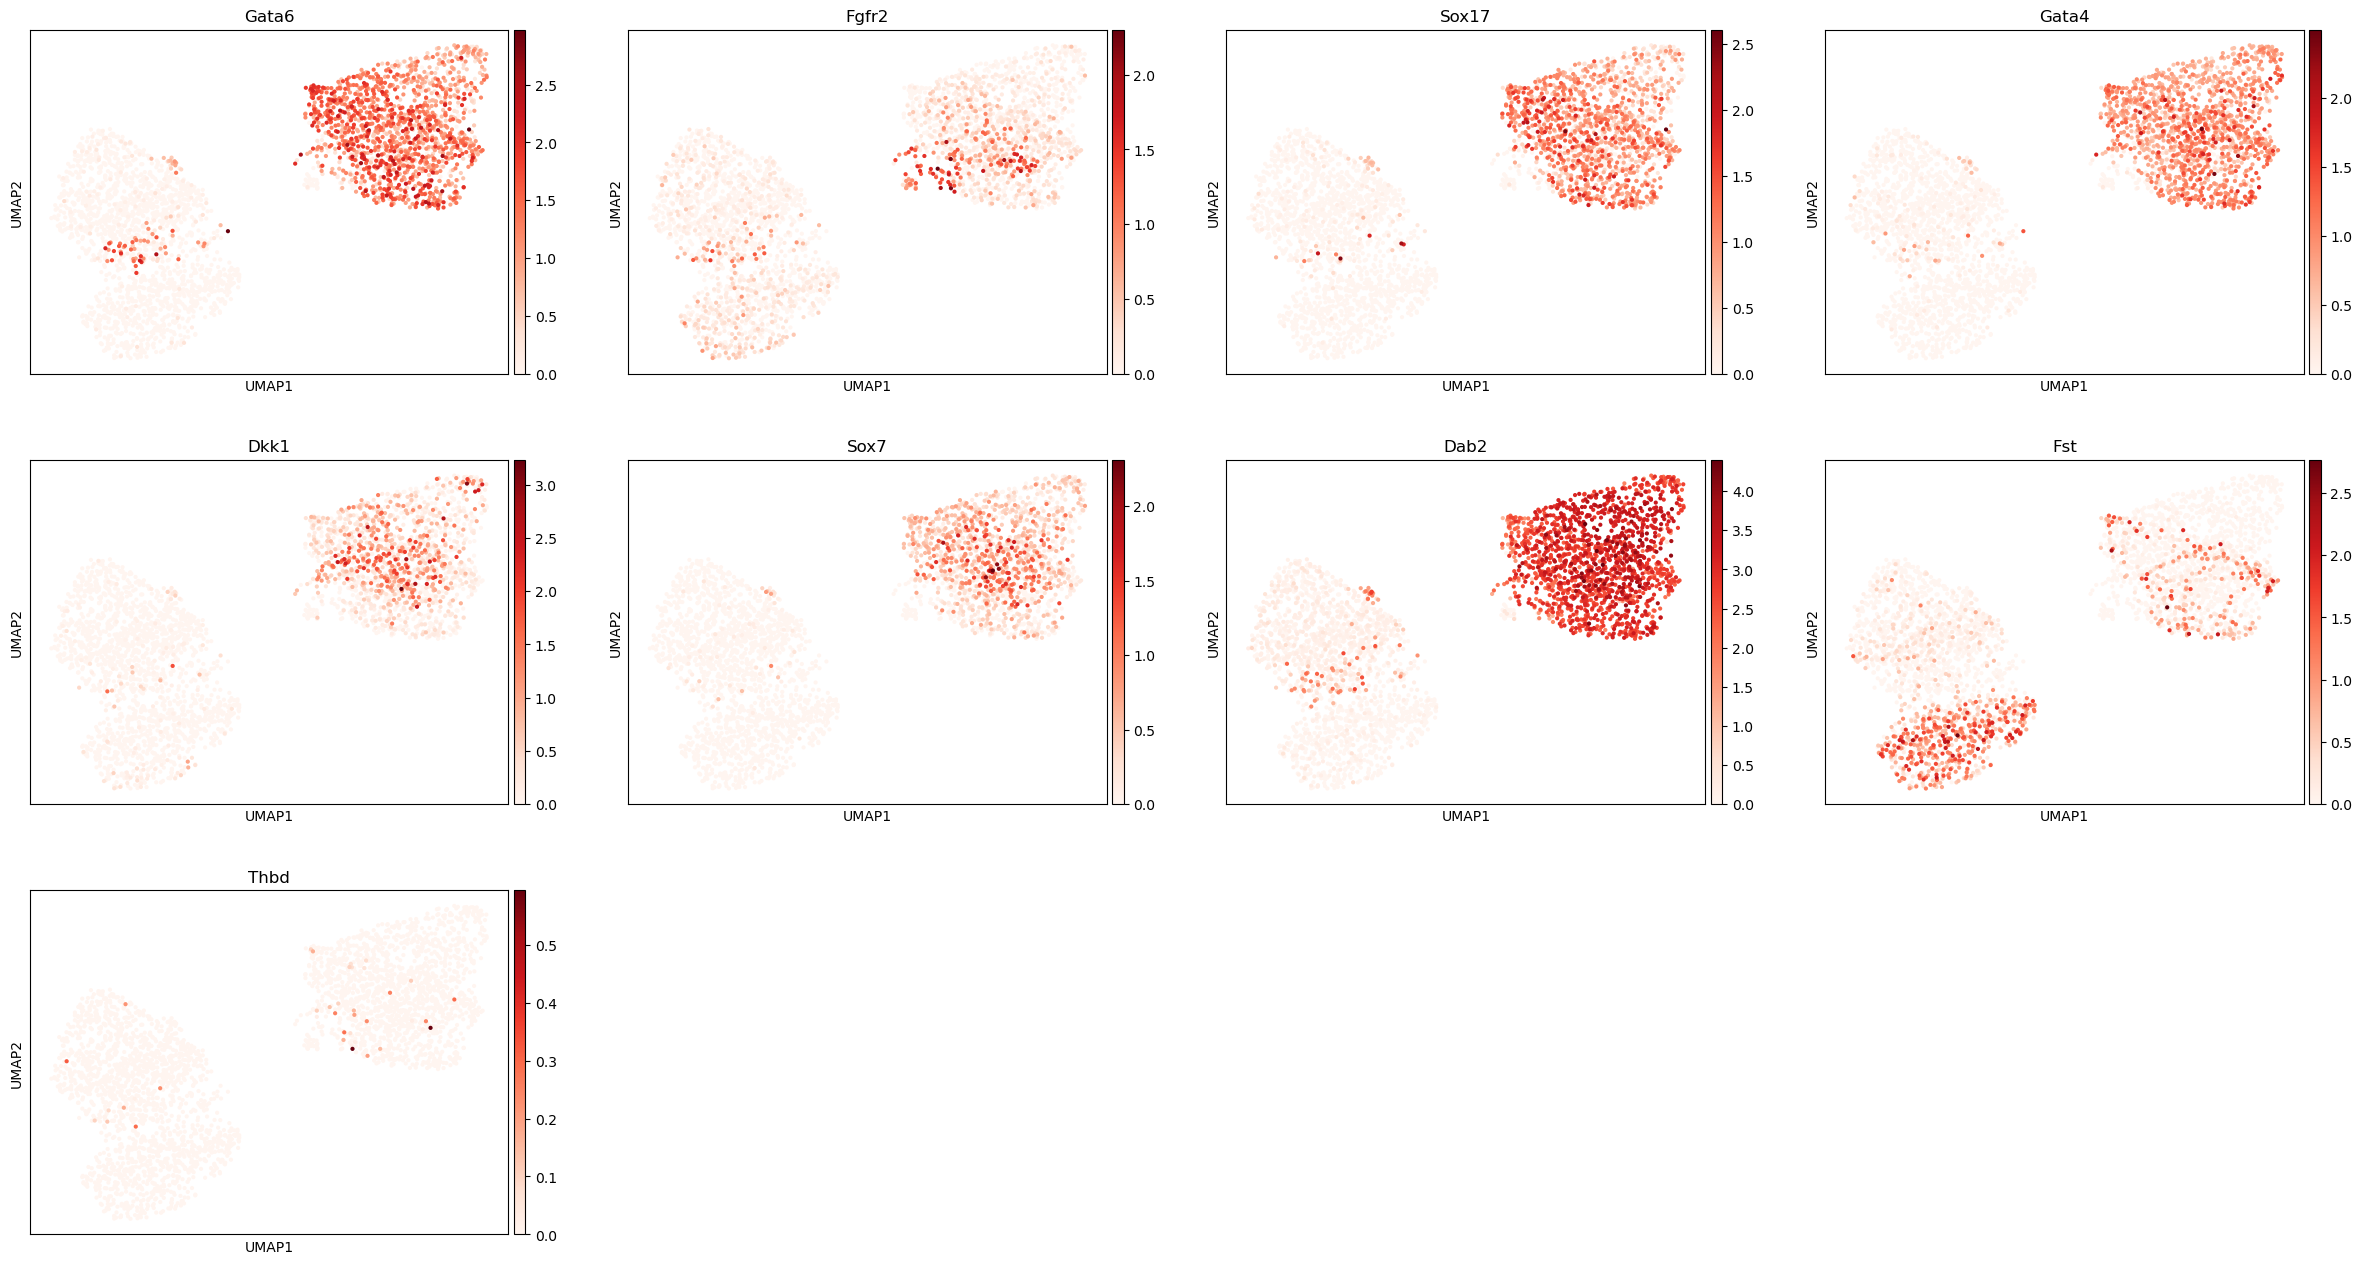

In [15]:
sc.pl.umap(adata, color=['Gata6', 'Fgfr2', 'Sox17', 'Gata4', 'Dkk1', 'Sox7', 'Dab2', 'Fst', 'Thbd'], legend_loc='on data', color_map=mpl.cm.Reds)

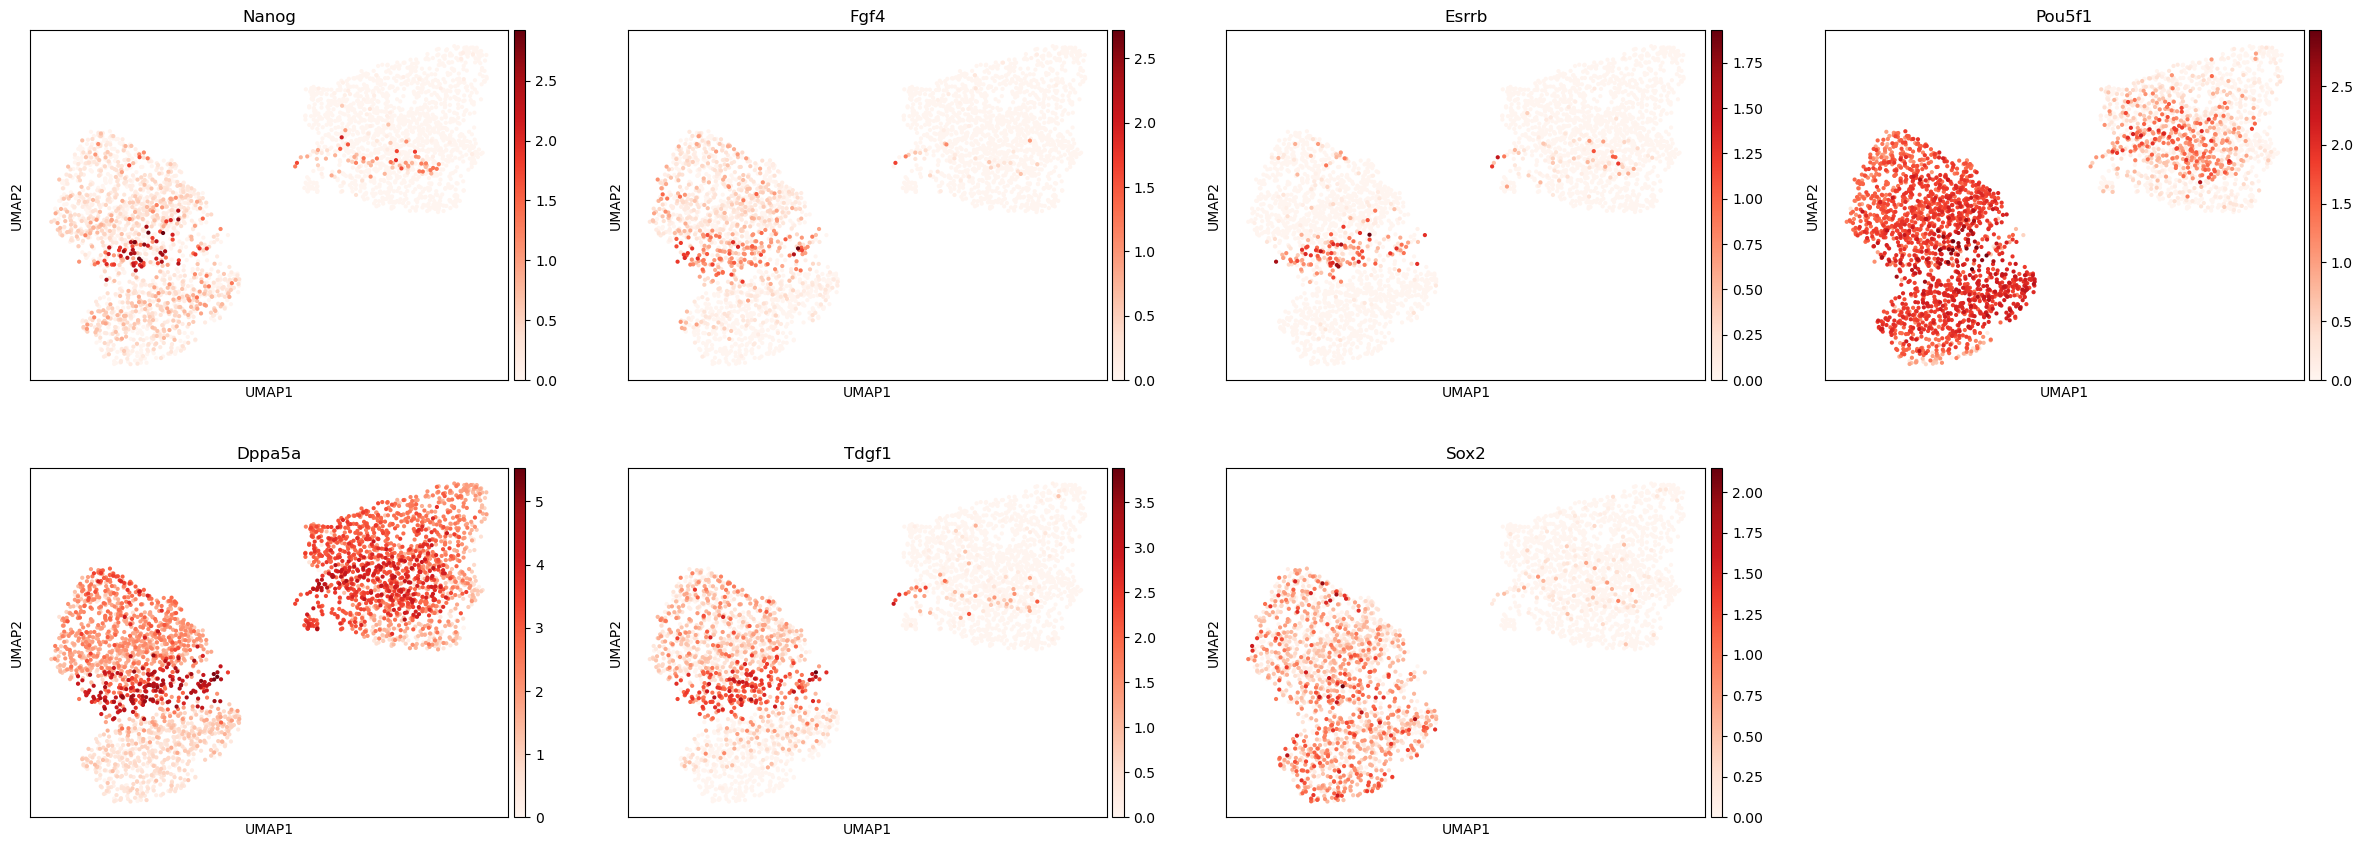

In [16]:
sc.pl.umap(adata, color=['Nanog', 'Fgf4', 'Esrrb', 'Pou5f1', 'Dppa5a', 'Tdgf1', 'Sox2'], legend_loc='on data', color_map=mpl.cm.Reds)

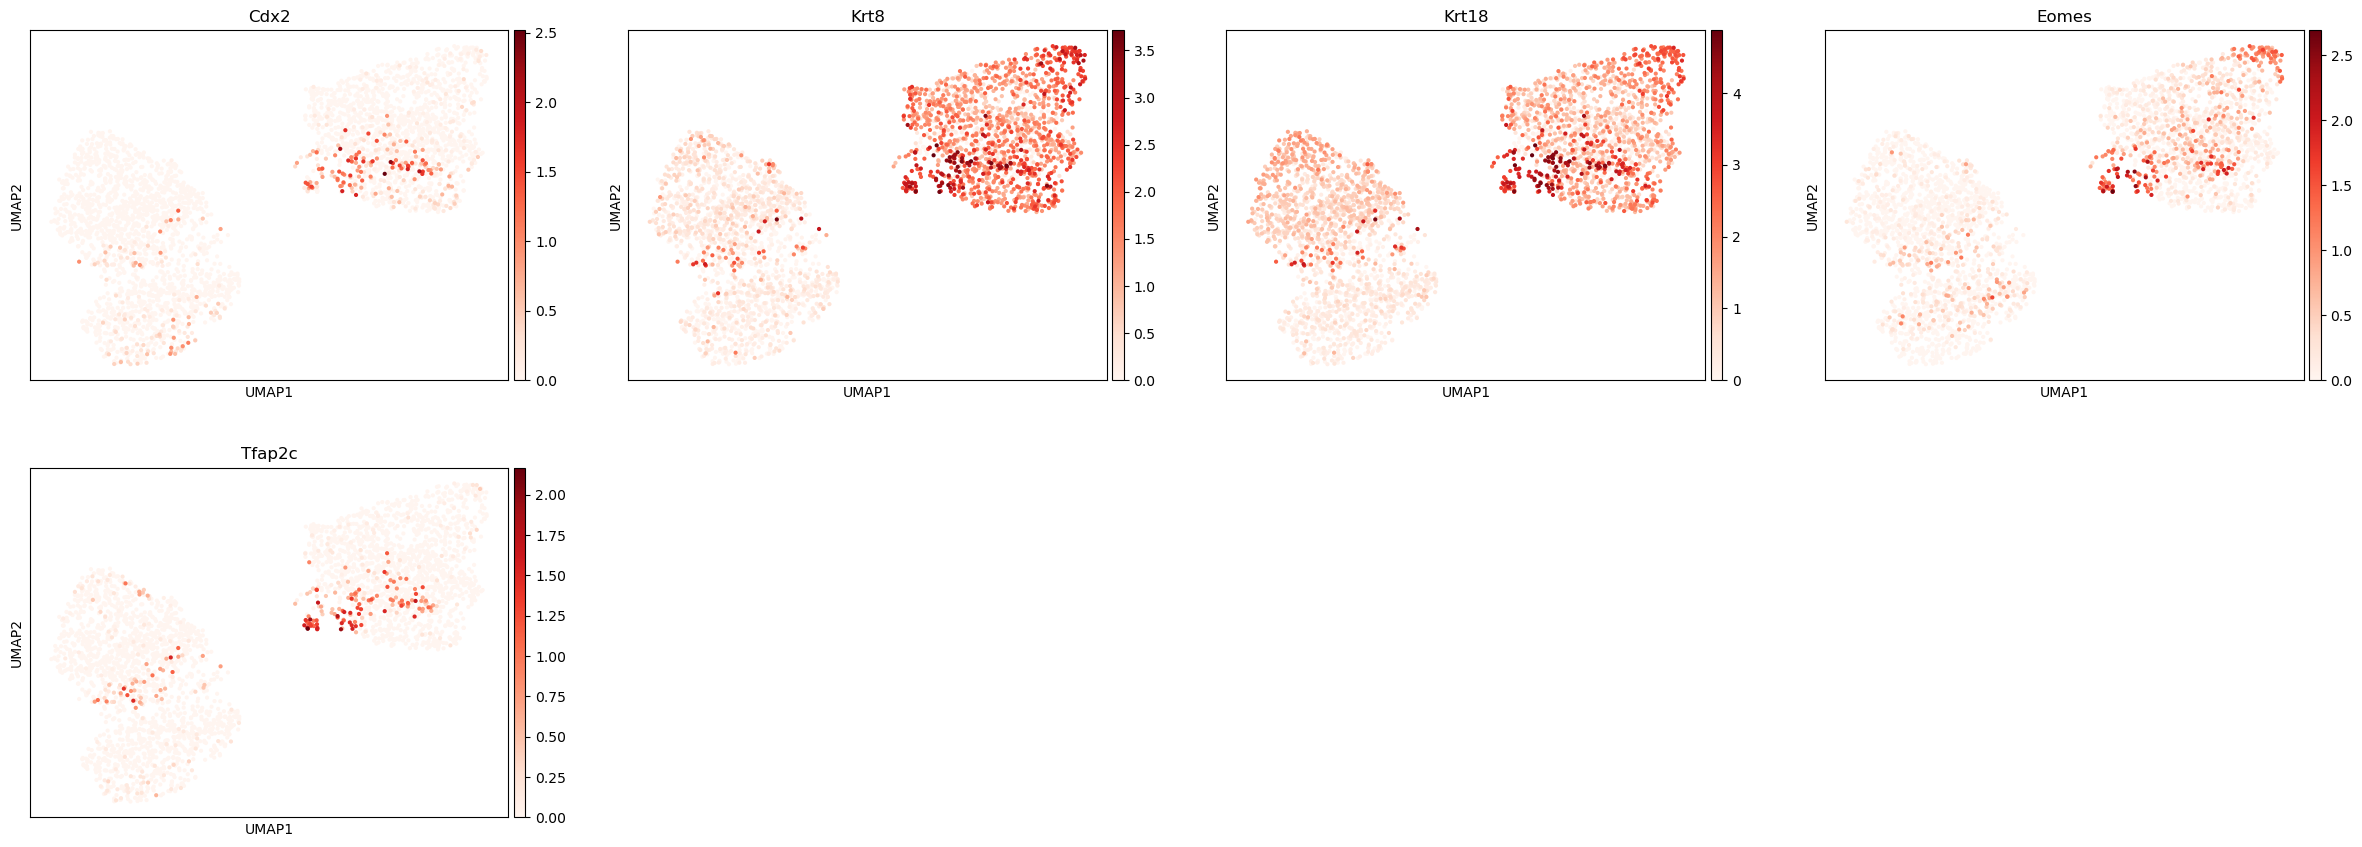

In [17]:
sc.pl.umap(adata, color=['Cdx2', 'Krt8', 'Krt18', 'Eomes', 'Tfap2c'], legend_loc='on data', color_map=mpl.cm.Reds)

We see that the high number of cells absorb the standard so I try to take 500 cells

**Take only 500 cells**

In [4]:
adata = ad.read_h5ad('Processing/test/Objects/object_8_Schu_filtered_1.h5ad')
n_cells = adata.n_obs

# Randomly select 500 cells
selected_indices = np.random.choice(n_cells, 500, replace=False)

# Créer un nouvel objet AnnData avec les cellules sélectionnées
adata_subset = adata[selected_indices, :]

#adata_subset.write(('Processing/Schu_ssVrij/Objects/object_8_Schu_filtered_1_500cells.h5ad'))

"adata_subset.write(('Processing/Schu_ssVrij/Objects/object_8_Schu_filtered_1_500cells.h5ad'))\n"

**Read the object**

In [26]:
adata = ad.read_h5ad('Processing/Schu_ssVrij/Objects/object_1_Deng_filtered_1_2_Chen_filtered_1_3_Mohammed_filtered_1_4_Nowo_filtered_1_4bis_Nowo_filtered_1_5_Posfai_filtered_2_6_Arg_filtered_1_8_Schu_filtered_1_500cells.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 1136 × 35704
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'n_genes'


**Normalize data and run PCA**

In [27]:
# Data normalization
sc.pp.normalize_total(adata, target_sum=1e4)

# Log on datas
sc.pp.log1p(adata)

# Stock data logs 
adata.raw = adata

# Scale the data
sc.pp.scale(adata)

# Highly variable genes
sc.pp.highly_variable_genes(adata)

# Run PCA
sc.tl.pca(adata)

**Run harmony and UMAPs**

In [28]:
# Run harmony
sc.external.pp.harmony_integrate(adata, 'dataset', theta = 1, max_iter_harmony = 20, nclust = 4)

2024-07-09 10:42:59,958 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
2024-07-09 10:43:01,126 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-09 10:43:01,126 - harmonypy - INFO - Iteration 1 of 20
2024-07-09 10:43:01,186 - harmonypy - INFO - Iteration 2 of 20
2024-07-09 10:43:01,285 - harmonypy - INFO - Iteration 3 of 20
2024-07-09 10:43:01,325 - harmonypy - INFO - Iteration 4 of 20
2024-07-09 10:43:01,376 - harmonypy - INFO - Iteration 5 of 20
2024-07-09 10:43:01,418 - harmonypy - INFO - Iteration 6 of 20
2024-07-09 10:43:01,519 - harmonypy - INFO - Iteration 7 of 20
2024-07-09 10:43:01,638 - harmonypy - INFO - Iteration 8 of 20
2024-07-09

In [29]:
# Save new PCA
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']

# Find neighbors
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20)

# Make groups
sc.tl.louvain(adata, resolution=0.8)

# Run UMAP
sc.tl.umap(adata)

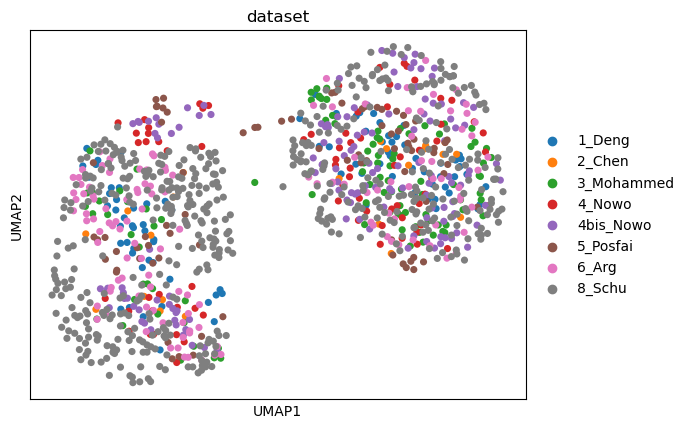

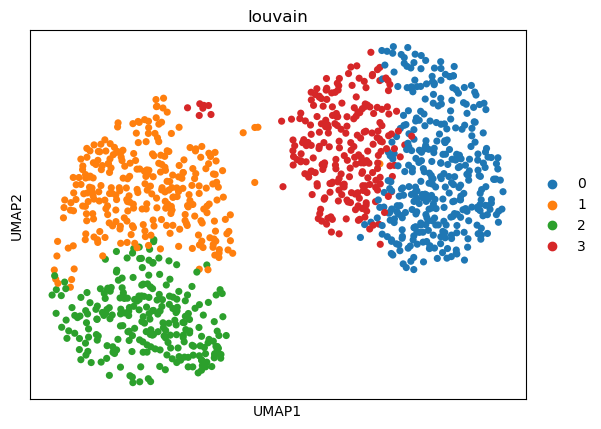

In [30]:
sc.pl.umap(adata, color=['dataset'])

sc.pl.umap(adata, color=['louvain'])

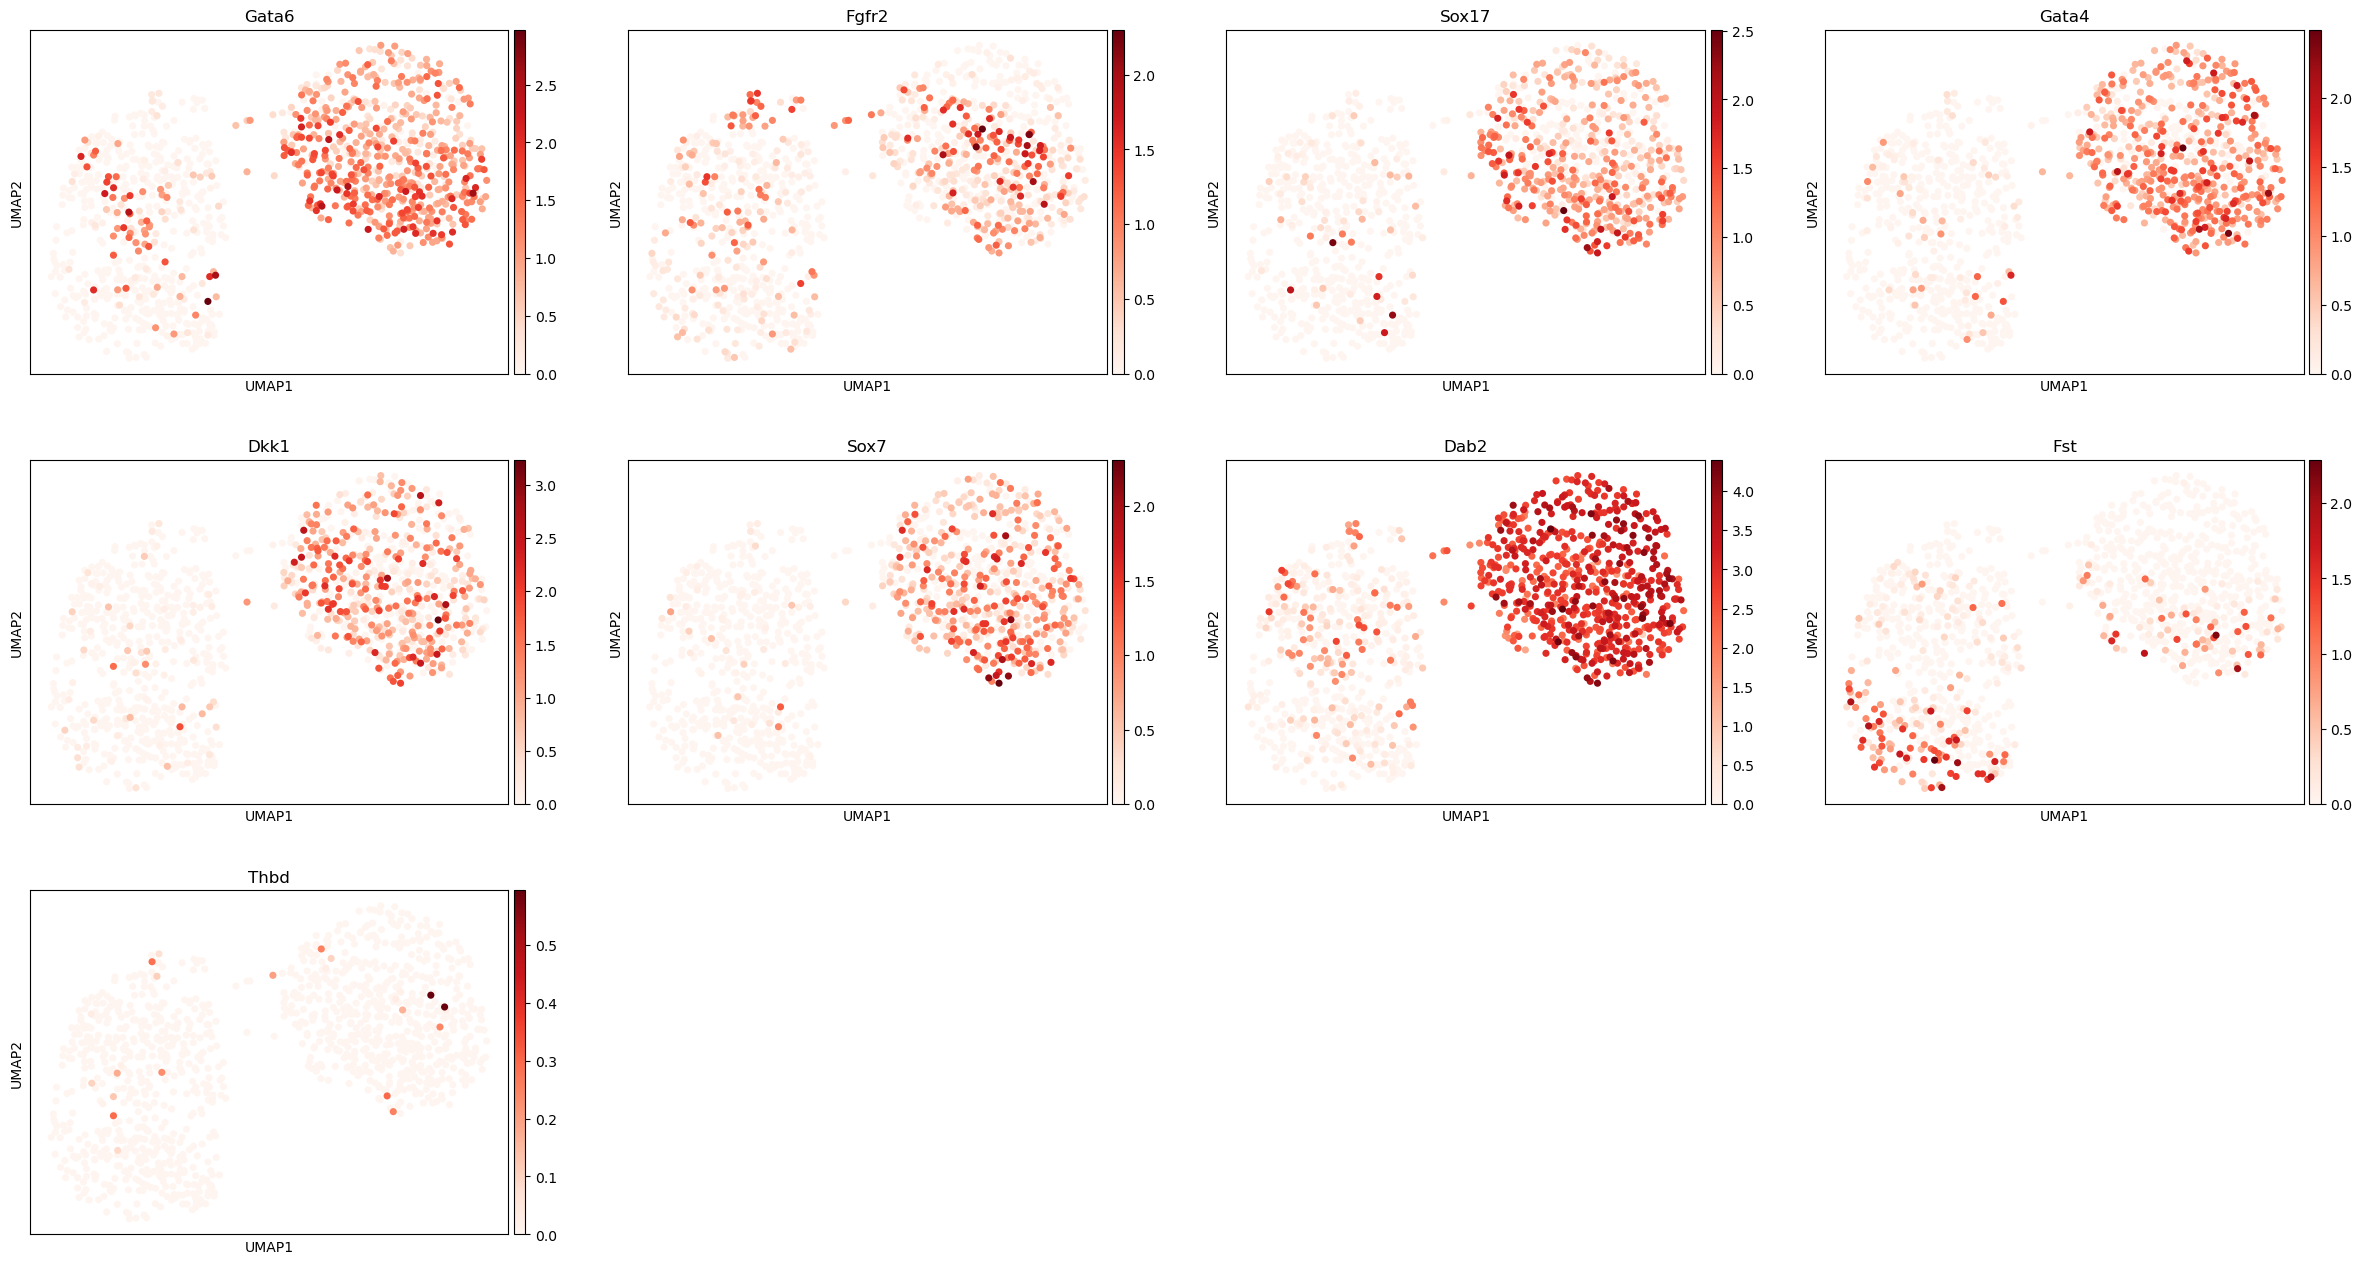

In [31]:
sc.pl.umap(adata, color=['Gata6', 'Fgfr2', 'Sox17', 'Gata4', 'Dkk1', 'Sox7', 'Dab2', 'Fst', 'Thbd'], legend_loc='on data', color_map=mpl.cm.Reds)


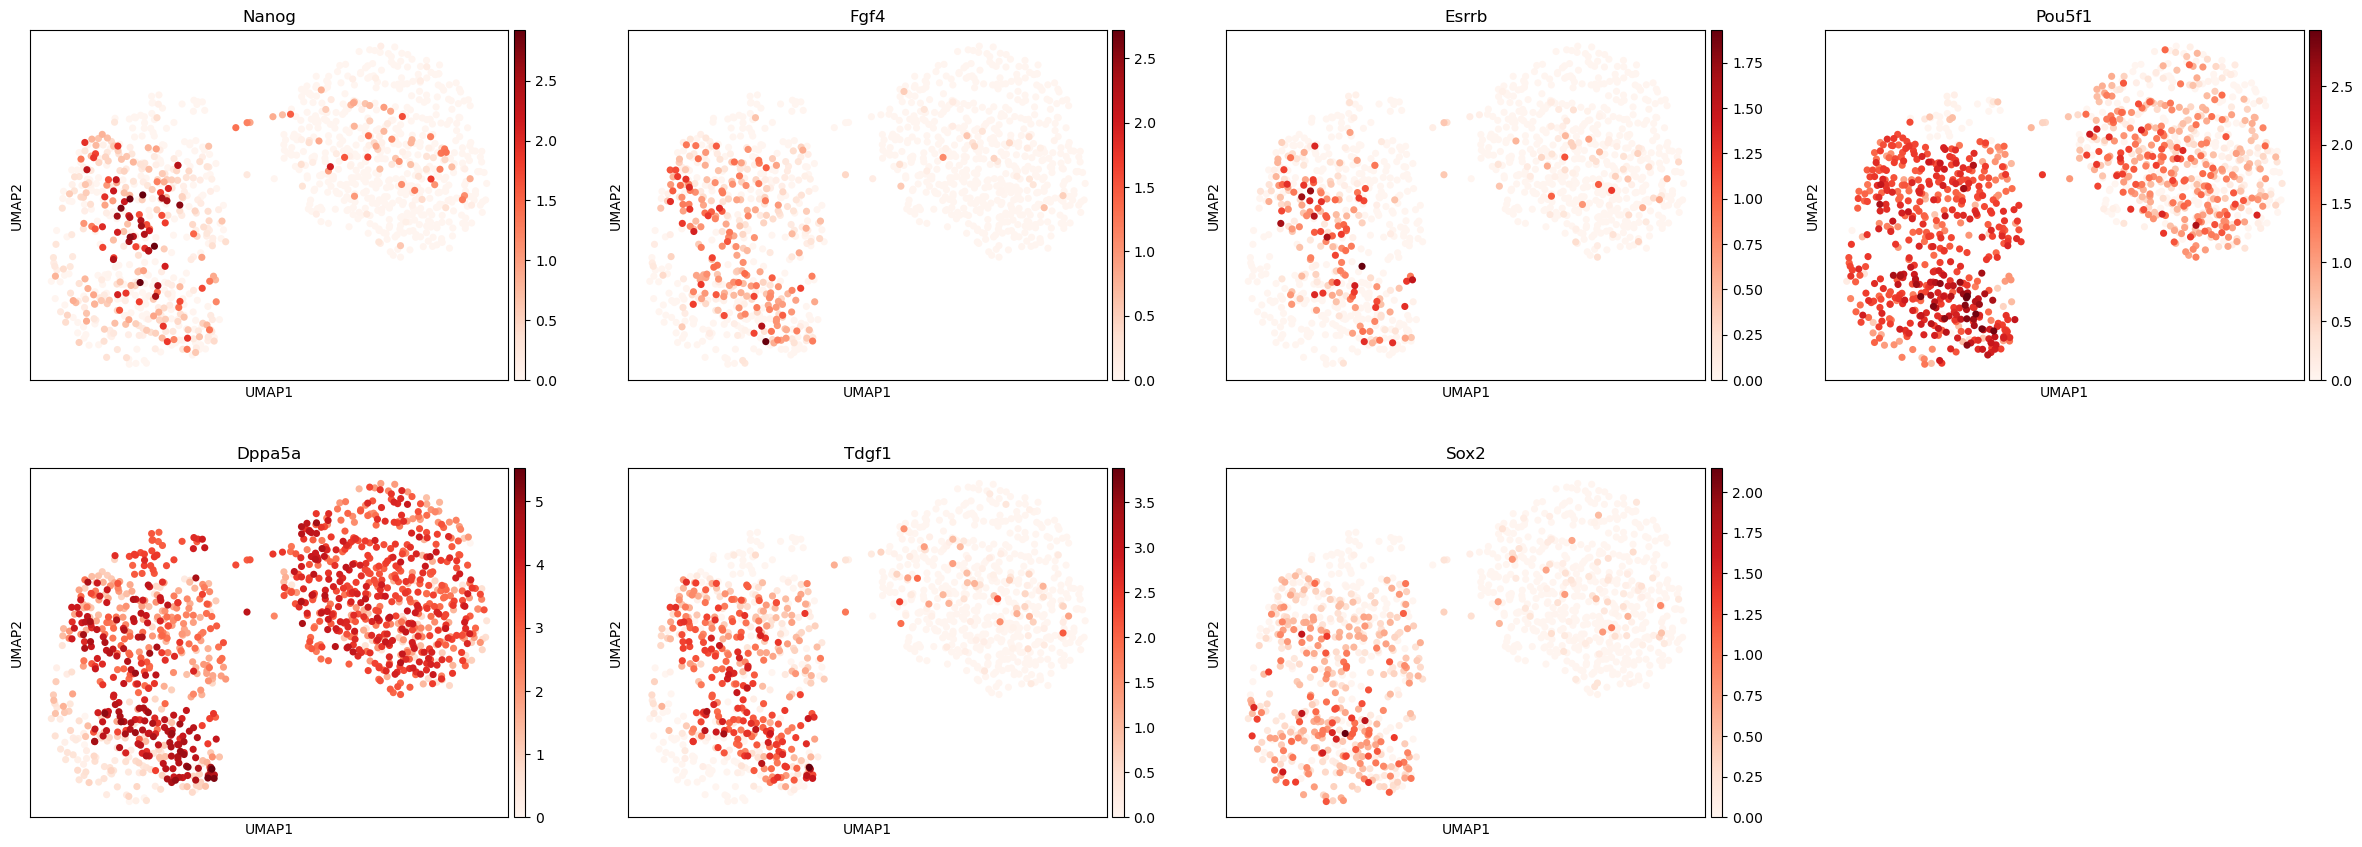

In [32]:
sc.pl.umap(adata, color=['Nanog', 'Fgf4', 'Esrrb', 'Pou5f1', 'Dppa5a', 'Tdgf1', 'Sox2'], legend_loc='on data', color_map=mpl.cm.Reds)

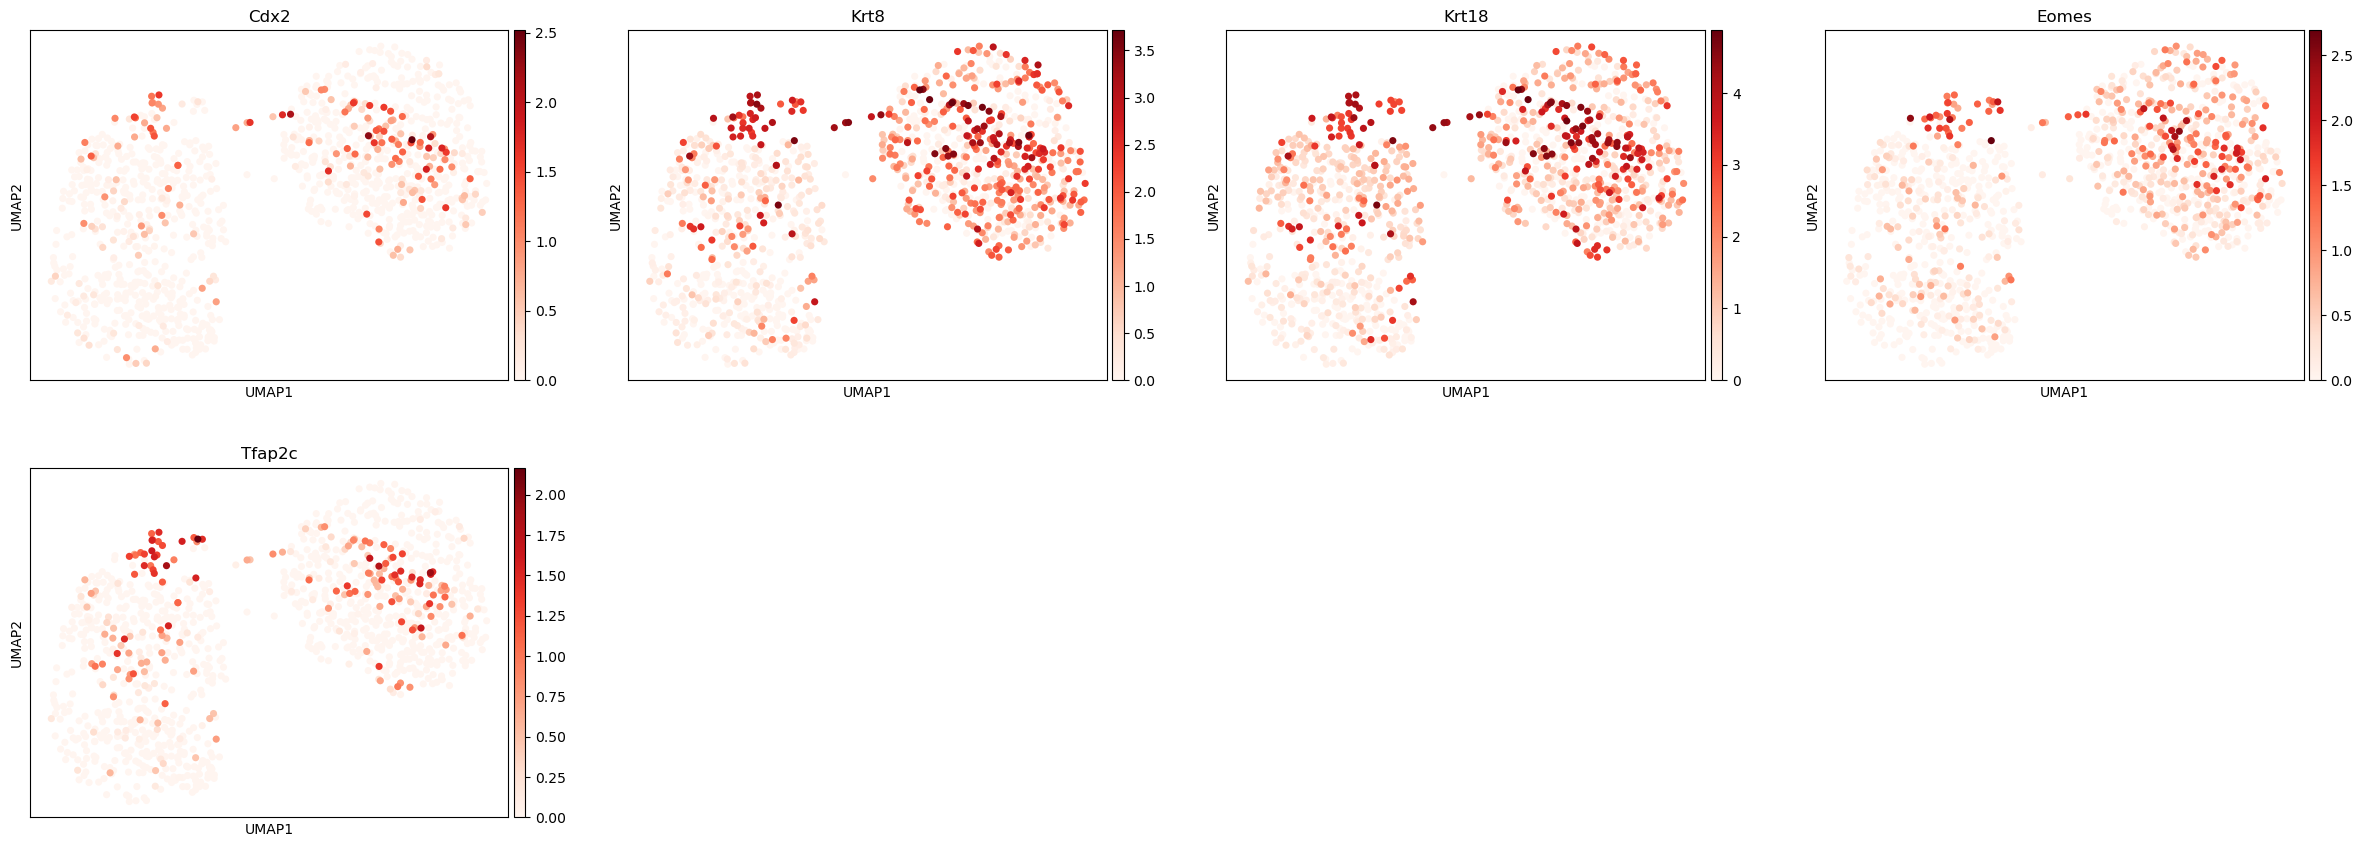

In [33]:
sc.pl.umap(adata, color=['Cdx2', 'Krt8', 'Krt18', 'Eomes', 'Tfap2c'], legend_loc='on data', color_map=mpl.cm.Reds)

We see that the TE cells are in the epiblast, so I remove TE cells

**Read standard object processed and take TE cells**

In [5]:
adata = ad.read_h5ad('Objects/object_standard_processed.h5ad')
ad_sub = adata[adata.obs['cell_type'] != 'TE']
l = ad_sub.obs_names.tolist() 

**Read objects and exclude TE cells**

In [6]:
adata1 = ad.read_h5ad('Processing/standardv2/Objects/object_1_Deng_filtered_1.h5ad')
# Filtering another AnnData object to exclude TE cells
adata1 = adata1[~adata1.obs_names.isin(l)]

adata2 = ad.read_h5ad('Processing/standardv2/Objects/object_2_Chen_filtered_1.h5ad')
adata2 = adata2[~adata2.obs_names.isin(l)]

adata3 = ad.read_h5ad('Processing/standardv2/Objects/object_3_Mohammed_filtered_1.h5ad')
adata3 = adata3[~adata3.obs_names.isin(l)]

adata4 = ad.read_h5ad('Processing/standardv2/Objects/object_4_Nowo_filtered_1.h5ad')
adata4 = adata4[~adata4.obs_names.isin(l)]

adata5 = ad.read_h5ad('Processing/standardv2/Objects/object_4bis_Nowo_filtered_1.h5ad')
adata5 = adata5[~adata5.obs_names.isin(l)]

adata6 = ad.read_h5ad('Processing/standardv2/Objects/object_5_Posfai_filtered_1.h5ad')
adata6 = adata6[~adata6.obs_names.isin(l)]

adata7 = ad.read_h5ad('Processing/standardv2/Objects/object_6_Arg_filtered_1.h5ad')
adata7 = adata7[~adata7.obs_names.isin(l)]

adata8 = ad.read_h5ad('Processing/Schu_ssVrij/Objects/object_8_Schu_filtered_1_500cells.h5ad')


**Merge objects without TE cells**

In [7]:
adata = ad.concat([adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8], join='outer')

**Normalize data and run PCA**

In [8]:
# Data normalization
sc.pp.normalize_total(adata, target_sum=1e4)

# Log on datas
sc.pp.log1p(adata)

# Stock data logs 
adata.raw = adata

# Scale the data
sc.pp.scale(adata)

# Highly variable genes
sc.pp.highly_variable_genes(adata)

# Run PCA
sc.tl.pca(adata)

**Run harmony and UMAPs**

In [9]:
# Run harmony
sc.external.pp.harmony_integrate(adata, 'dataset', theta = 1, max_iter_harmony = 20, nclust = 3)

2024-07-08 13:58:00,615 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
2024-07-08 13:58:02,406 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-08 13:58:02,406 - harmonypy - INFO - Iteration 1 of 20
2024-07-08 13:58:02,466 - harmonypy - INFO - Iteration 2 of 20
2024-07-08 13:58:02,537 - harmonypy - INFO - Iteration 3 of 20
2024-07-08 13:58:02,597 - harmonypy - INFO - Converged after 3 iterations


In [10]:
# Save new PCA
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']

# Find neighbors
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20)

# Make groups
sc.tl.louvain(adata, resolution=0.8)

# Run UMAP
sc.tl.umap(adata)

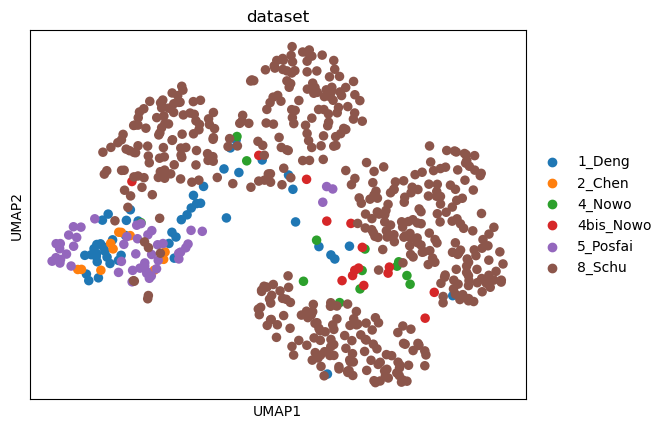

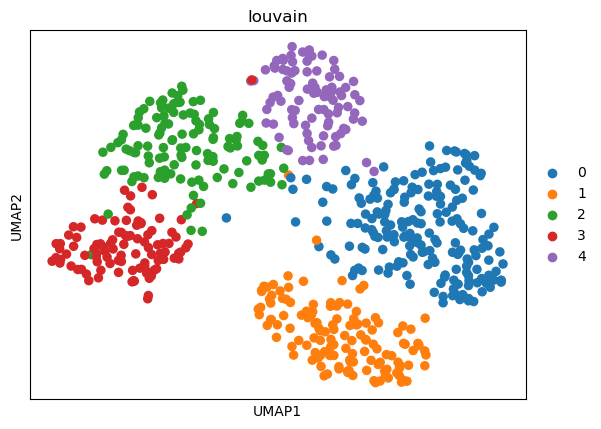

In [11]:
sc.pl.umap(adata, color=['dataset'])

sc.pl.umap(adata, color=['louvain'])

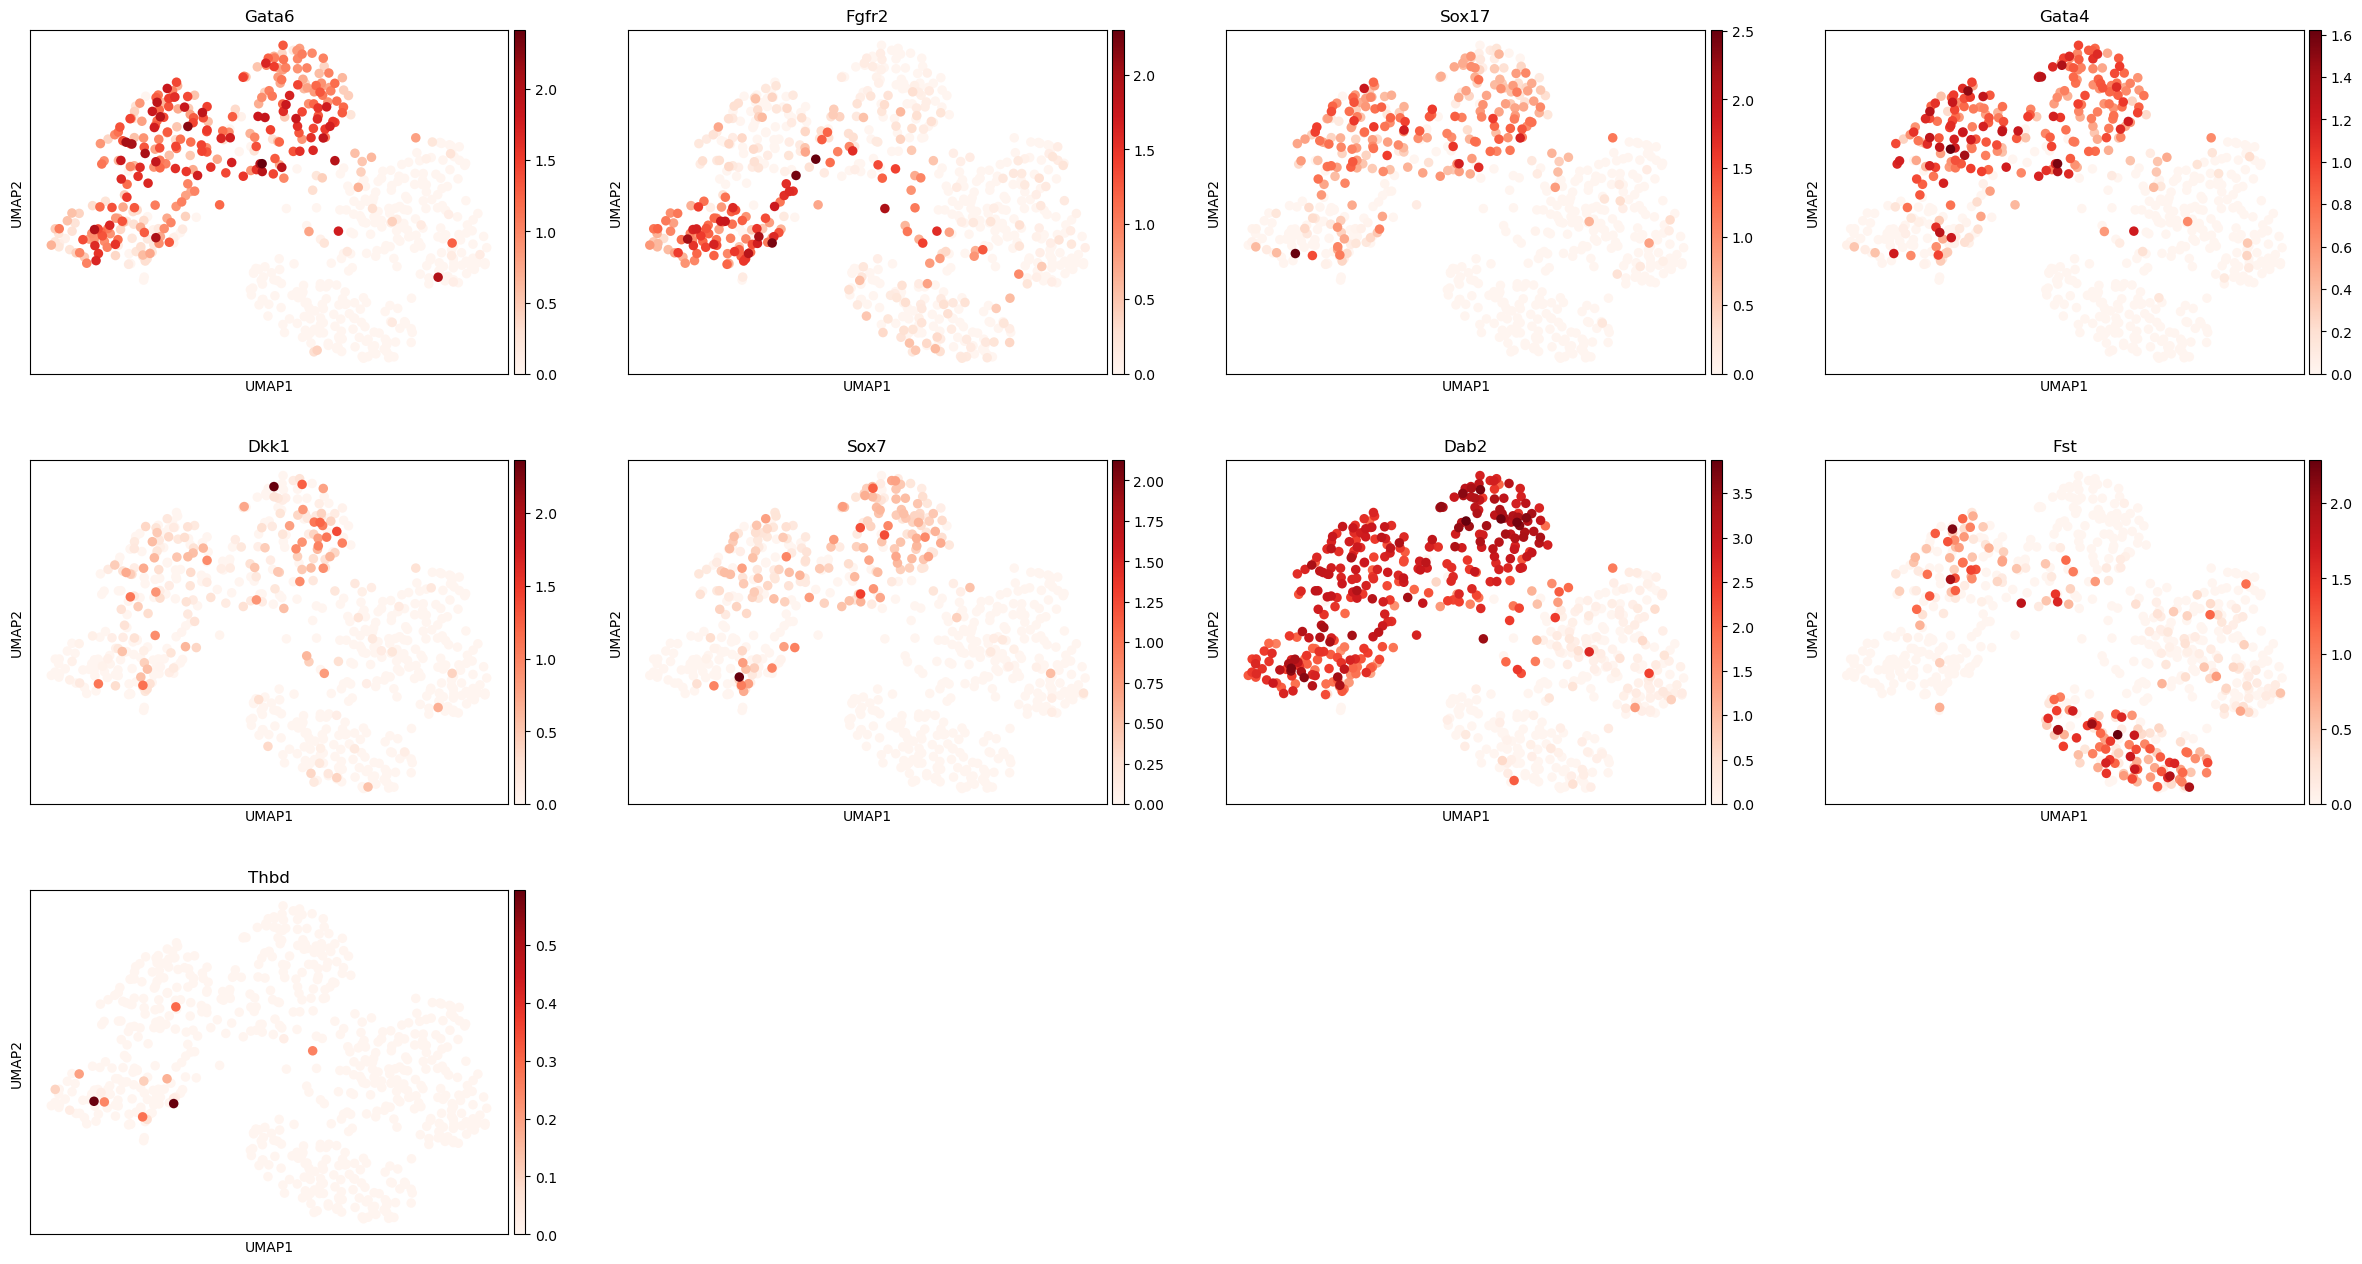

In [12]:
sc.pl.umap(adata, color=['Gata6', 'Fgfr2', 'Sox17', 'Gata4', 'Dkk1', 'Sox7', 'Dab2', 'Fst', 'Thbd'], legend_loc='on data', color_map=mpl.cm.Reds)


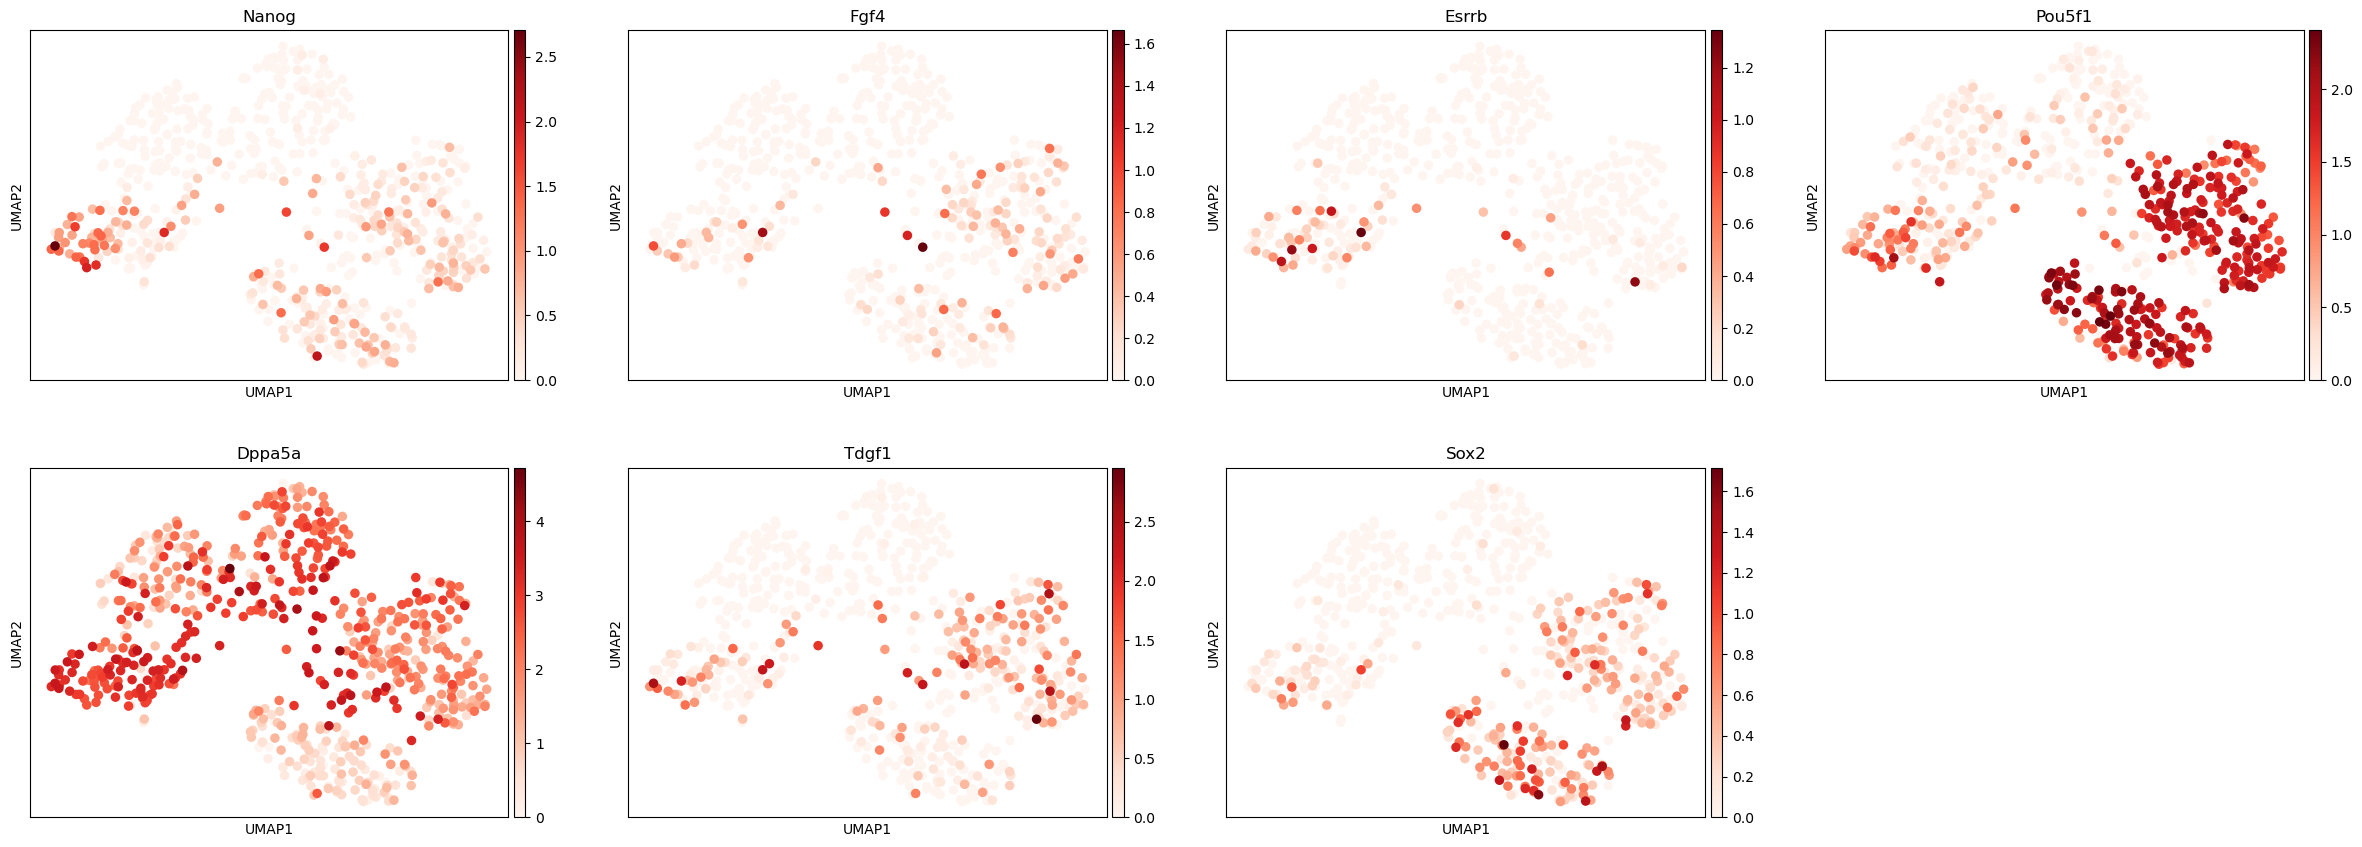

In [13]:
sc.pl.umap(adata, color=['Nanog', 'Fgf4', 'Esrrb', 'Pou5f1', 'Dppa5a', 'Tdgf1', 'Sox2'], legend_loc='on data', color_map=mpl.cm.Reds)

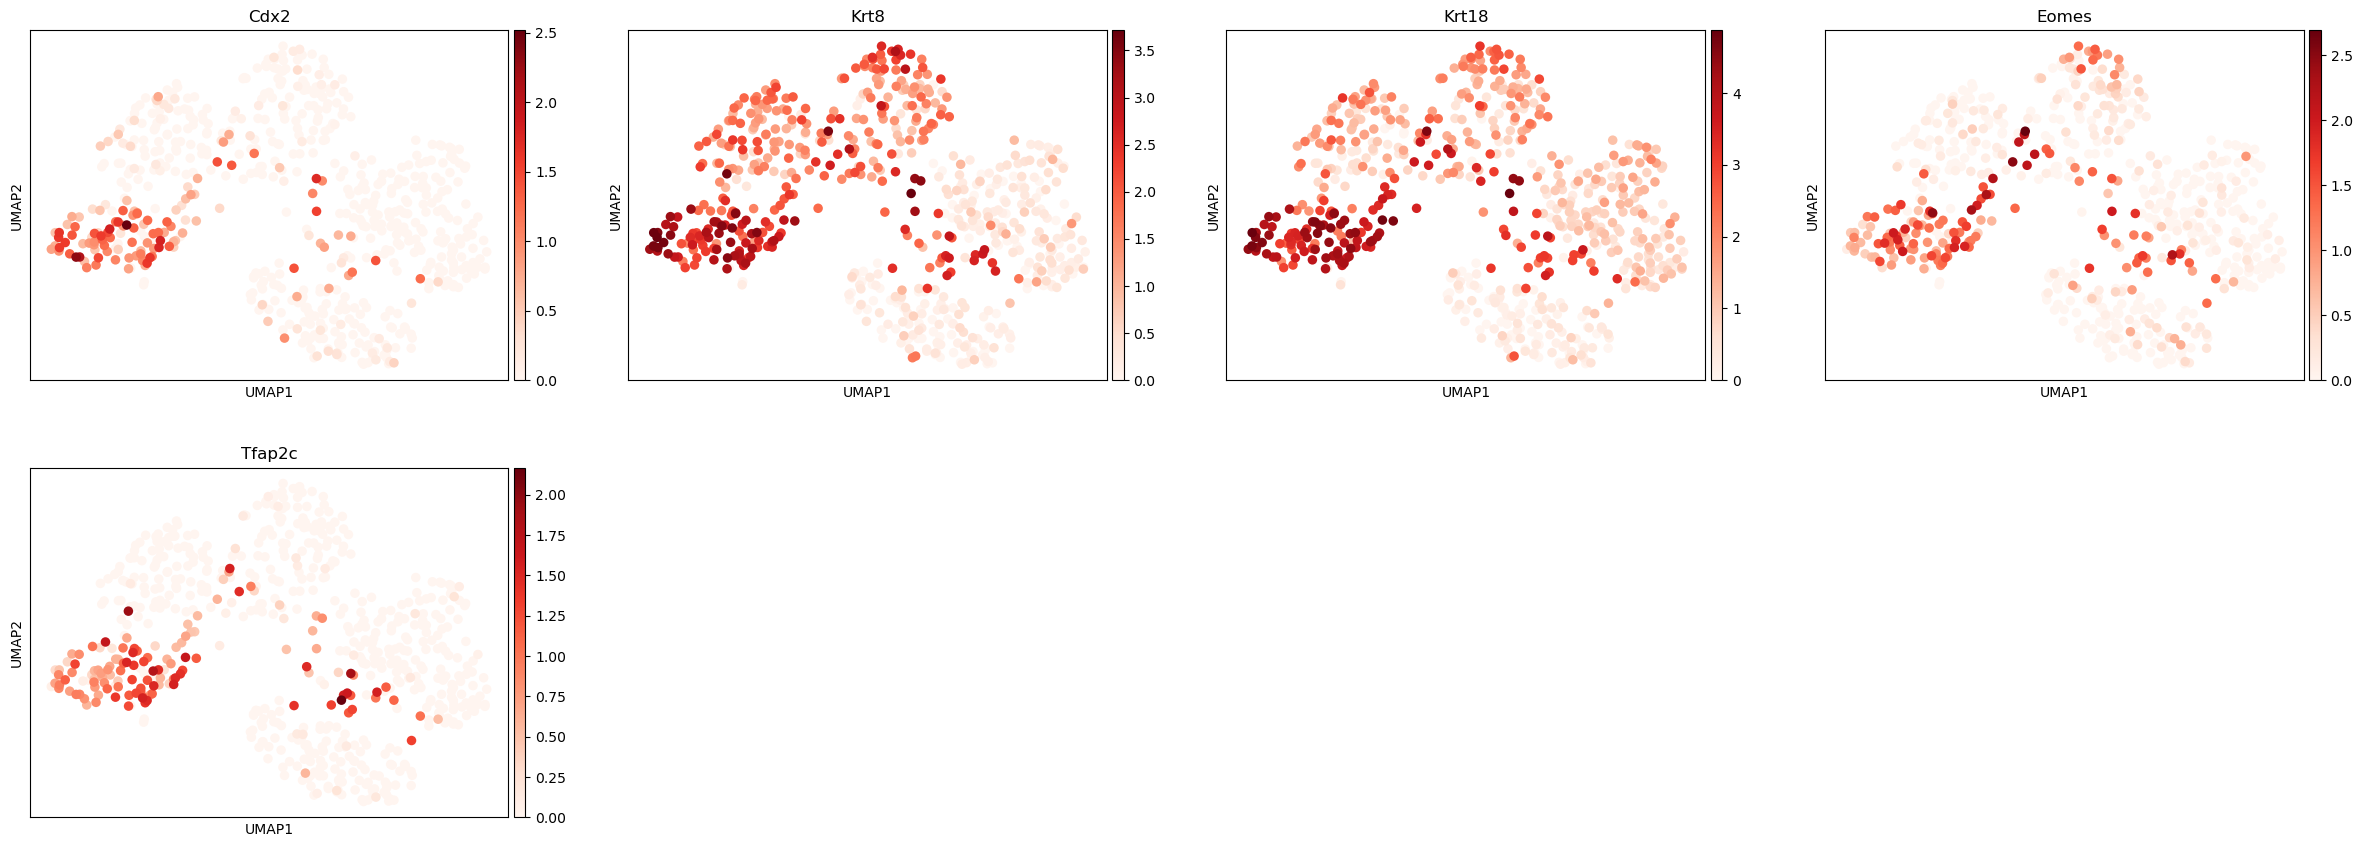

In [14]:
sc.pl.umap(adata, color=['Cdx2', 'Krt8', 'Krt18', 'Eomes', 'Tfap2c'], legend_loc='on data', color_map=mpl.cm.Reds)